# Introduction


In [1]:
# Dependencies
library(ggplot2)
library(dplyr)
library(tidyverse)
library(repr)
library(tidyr)
library(tidymodels)
library(readxl)

# Read dataset from CSV format
salaries = read.csv('data/salaries.csv')
head(salaries)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ r

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2023,SE,FT,ML Engineer,170000,AUD,114979,AU,100,AU,L
2,2023,SE,FT,Data Scientist,287500,USD,287500,US,0,US,M
3,2023,SE,FT,Data Scientist,168000,USD,168000,US,0,US,M
4,2023,SE,FT,Data Engineer,155000,USD,155000,US,0,US,M
5,2023,SE,FT,Data Engineer,140000,USD,140000,US,0,US,M
6,2023,EX,FT,Data Lead,230000,USD,230000,US,0,US,M


In [2]:
# Clean and tidy dataset
# 1. Filter dataset such that remote_ratio is either 0 or 100
salaries_filtered <- salaries %>%
    filter(remote_ratio == 0 | remote_ratio == 100) |>
    select(remote_ratio, salary_in_usd)

colnames(salaries_filtered) <- c("job_type", "salary_in_USD")

salaries_job_type <-  salaries_filtered |>
                       mutate(job_type = case_when(job_type == 100 ~ "Remote",
                                 job_type == 0 ~ "In-Person")) |>
                                 mutate(job_type = as_factor(job_type))
head(salaries_job_type)
                              


,job_type,salary_in_USD
,<fct>,<int>
1,Remote,114979
2,In-Person,287500
3,In-Person,168000
4,In-Person,155000
5,In-Person,140000
6,In-Person,230000


In [5]:
# # 2. Combine jobs into categories
# pattern <- "\\b(Scientist)\\b"
# filtered_job_titles <- unique(salaries$job_title[grepl(pattern, salaries$job_title)])

# for (title in filtered_job_titles) {
#     print(title)
# }

# Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.
salary_estimates <- salaries_job_type %>%
  group_by(job_type) %>%
  summarize(
    salary_mean = mean(salary_in_USD, na.rm = TRUE),
    salary_median = median(salary_in_USD, na.rm = TRUE),
    salary_sd = sd(salary_in_USD, na.rm = TRUE)
  )

head(salary_estimates)

job_type,salary_mean,salary_median,salary_sd
<fct>,<dbl>,<int>,<dbl>
Remote,144153.5,141525,60612.70
In-Person,155717.1,145000,64377.03


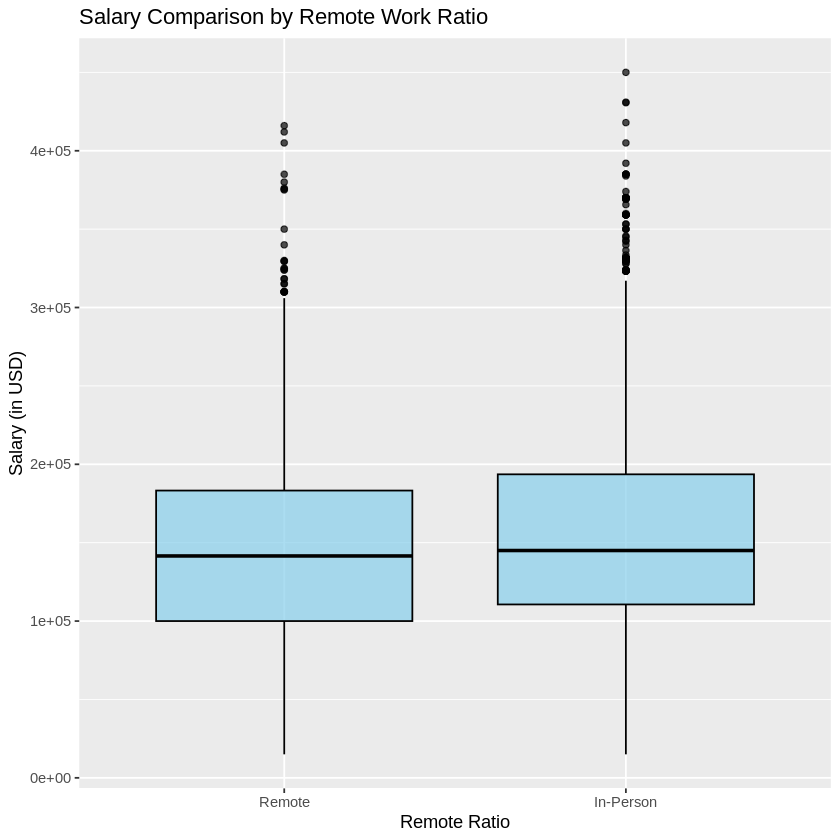

In [6]:
# Plot the relevant raw data, tailoring your plot in a way that addresses your question.
  ggplot(salaries_job_type, aes(x = as.factor(job_type), y = salary_in_USD)) +
  geom_boxplot(fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Salary Comparison by Remote Work Ratio", x = "Remote Ratio", y = "Salary (in USD)", color = "Mean")